In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [42]:
df = pd.read_csv('Income-1.csv')

In [43]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income($)')

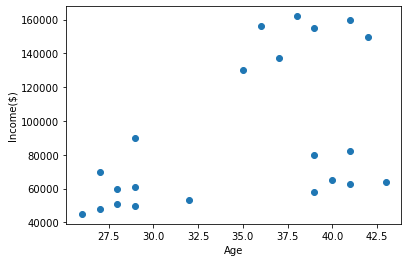

In [16]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [17]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age',  'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [21]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

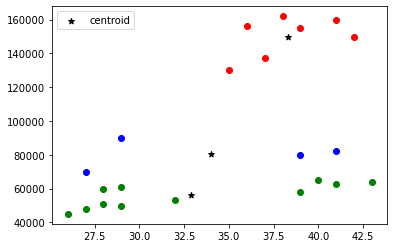

In [28]:
df['Cluster'] = y_predicted
km.cluster_centers_
df0 = df[df['Cluster'] == 0]
df1 = df[df['Cluster'] == 1]
df2 = df[df['Cluster'] == 2]
plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker='*', label='centroid')
plt.legend()

In [23]:
df0

,Name,Age,Income($),Cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0
14,Stark,29,49500,0
15,Ranbir,32,53000,0
16,Dipika,40,65000,0
17,Priyanka,41,63000,0
18,Nick,43,64000,0


In [ ]:
#normalize my data

x_n = (x - x_min)/(x_max-x_min)

In [32]:
43-26

17

In [47]:
scaler = MinMaxScaler()

In [48]:
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [49]:
df['Income($)'] = scaler.transform(df[['Income($)']])

In [50]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [51]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


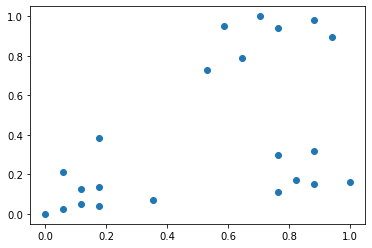

In [52]:
plt.scatter(df.Age, df['Income($)'])

In [53]:
#the shape of the dataset is preserved

In [54]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age',  'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

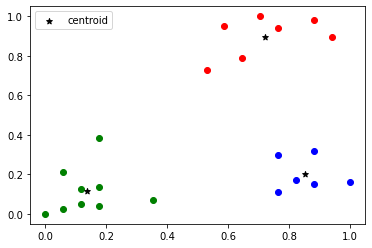

In [55]:
df['Cluster'] = y_predicted
km.cluster_centers_
df0 = df[df['Cluster'] == 0]
df1 = df[df['Cluster'] == 1]
df2 = df[df['Cluster'] == 2]
plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker='*', label='centroid')
plt.legend()

In [60]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age',  'Income($)']])
    sse.append(km.inertia_)

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


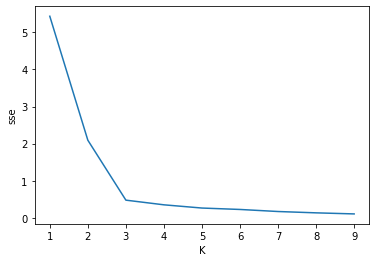

In [61]:
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_rng, sse)

In [ ]:
fit
predict
fit -> centroid
predict -> map the points to diff centroids based  on distance